# Mock Exam
<hr>  

## Untuk latihan kali ini, gunakan dataset diamonds dari seaborn.

Import library.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

In [5]:
df = sns.load_dataset('diamonds')
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

1. Untuk feature/column price, hitung dan beri penjelasan (insight) terkait:  
* Titik Pusat Data (Central Tendency)
* Persebaran Data (Dispersion)
* Distribusi Data (Distribution)


# Central Tendencies

In [7]:
df.describe()['price']

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [9]:
df['price'].mean()

3932.799721913237

In [11]:
df['price'].median()

2401.0

In [13]:
df['price'].mode()

0    605
dtype: int64

# Dispersion

In [15]:
# variance

df['price'].var()

15915629.424300838

In [17]:
# standard deviation

df['price'].std()

3989.4397381463023

In [19]:
# standar deviasi 3989.439 adalah relatif bervariasi untuk data price of diamonds

# cara lihatnya dari nilai mean, nilai mean-nya 3932.79
# kalau standar deviasi 39ribu, berarti variasi harga bisa berjarak 2 kali lipat dari mean 

# Distribution

In [21]:
stats.skew(df['price'])

# skewness positif

1.6183502776053016

In [23]:
stats.skewtest(df['price'])
# p value <0.5 maka reject H null, diasumsikan skewnessnya tidak normal

SkewtestResult(statistic=111.16245694940527, pvalue=0.0)

In [25]:
stats.kurtosis(df['price'], fisher=False)

# kurtosis tidak sama dengan 3, berarti distribusi tidak normal
# kurtosis >3 banyak outliers, Leptokurtic

5.177382669056634

In [27]:
stats.kurtosistest(df['price'])

# p value <0.5 maka reject H null, diasumsikan skewnessnya tidak normal

KurtosistestResult(statistic=52.340786436065, pvalue=0.0)

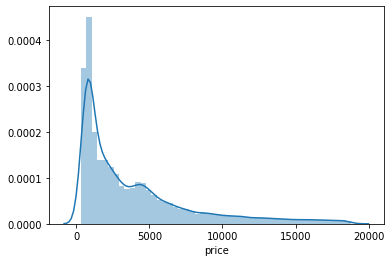

In [29]:
sns.distplot(df['price'])

# dapat dilihat pada distplot di bawah, distribusi data tidak normal
# skewness positif

In [31]:
# rata-rata harga diamond mungkin sekitar 100-200
# tapi sangat banyak diamond yg harganya sangat mahal (banyak outliers)

2. Carilah data outlier dan beri penjelasan (insight) pada feature/column carat!   
Tambahkan plot
untuk menampilkan adanya data outlier!


In [33]:
q1 = df['carat'].quantile(0.25)
q3 = df['carat'].quantile(0.75)
iqr = q3-q1

lower_whisker = df['carat'] < (q1 - 1.5*iqr)
upper_whisker = df['carat'] > (q3 + 1.5*iqr)

outliers = (lower_whisker | upper_whisker).sum()

outliers

# jumlah outliers adalh 1889

1889

In [35]:
df['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

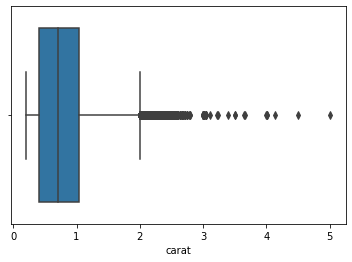

In [37]:
sns.boxplot(df['carat'])

In [39]:
# outliers bisa karena stock yg tersedia sedikit atau harga terlalu mahal

3. Tampilkan perkembangan rata-rata harga berlian (price) berdasarkan carat menggunakan plot yang tepat!   
Jelaskan (insight) harga berlian dari plot yang Anda buat!

In [41]:
price_carat = df.groupby('carat', as_index=False).mean()[['carat','price']]

price_carat

carat         price
0     0.20    365.166667
1     0.21    380.222222
2     0.22    391.400000
3     0.23    486.143345
4     0.24    505.185039
..     ...           ...
268   4.00  15984.000000
269   4.01  15223.000000
270   4.13  17329.000000
271   4.50  18531.000000
272   5.01  18018.000000

[273 rows x 2 columns]

Text(0.5, 1.0, 'Perkembangan rata-rata harga berlian (price) berdasarkan carat')

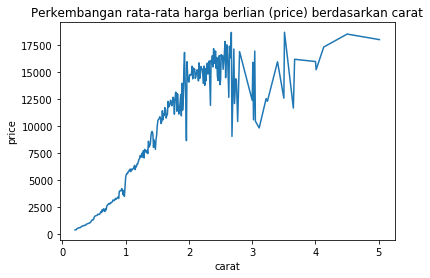

In [43]:
sns.lineplot(x='carat', y='price', data=price_carat)
plt.title('Perkembangan rata-rata harga berlian (price) berdasarkan carat') 

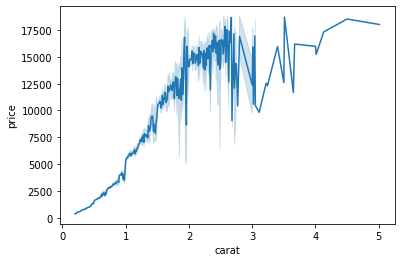

In [45]:
sns.lineplot(x='carat', y='price', data=df)

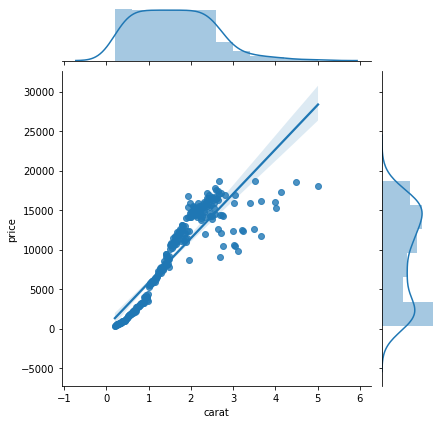

In [47]:
sns.jointplot(x='carat', y='price', data=price_carat, kind='reg')
# ini cuma untuk cek korelasi 

In [49]:
# semakin besar nilai caratnya, maka cenderung semakin besar harganya, terutama pada nilai carat 1-2

4. Tampilkan rata-rata harga berlian (price) berdasarkan jenis potongan (cut) menggunakan plot yang tepat!   
Jelaskan (insight) harga berlian dari plot yang Anda buat!

In [51]:
price_cut = df.groupby('cut', as_index=False).mean()[['cut','price']]
price_cut = price_cut.sort_values(by='price')

price_cut

cut        price
2      Ideal  3457.541970
1       Good  3928.864452
4  Very Good  3981.759891
0       Fair  4358.757764
3    Premium  4584.257704

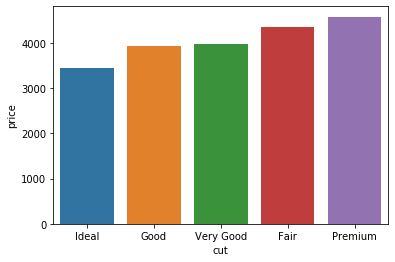

In [53]:
sns.barplot(x='cut', y='price', data=price_cut)


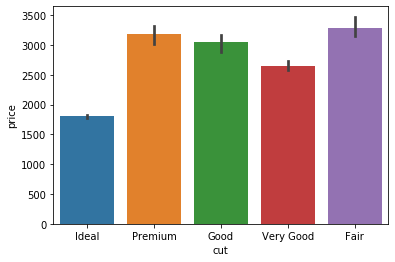

In [55]:
# estimator diganti median karena data bnyak outliers atau pake boxplot

sns.barplot(x='cut', y='price', data=df, estimator=np.median)


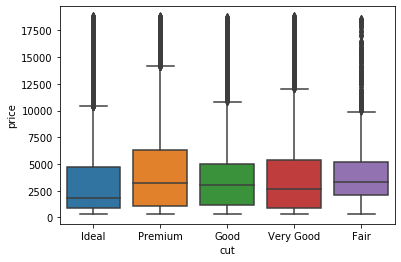

In [57]:
sns.boxplot(x='cut', y='price', data=df)

In [59]:
# dari barplot di atas menunjukkan harga rata-rata paling mahal ada pada category cut premium, dan paling murah ada pada cut ideal

# mending beli yg ideal, karena harga paling murah, tapi grade ke-2 terbaik

5. Feature/kolom mana yang memiliki korelasi tertinggi dengan feature/kolom price.  
Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan berlian setelah mengetahui nilai korelasi tersebut?


In [61]:
stats.normaltest(df['price'])

NormaltestResult(statistic=15096.649759774145, pvalue=0.0)

In [63]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
np.triu_indices_from(mask)

(array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3,
        4, 4, 4, 5, 5, 6], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 3, 4, 5, 6,
        4, 5, 6, 5, 6, 6], dtype=int64))

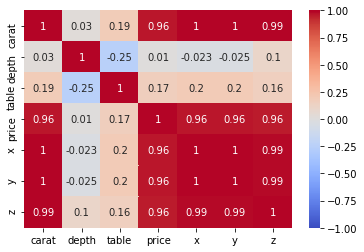

In [65]:
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [67]:
# yang memiliki korelasi paling besar dengan feature 'price' adalah  feature x,y,z, dan carat

# x,y,z adalah dimensi dari berliah

# jadi pilih salah satu aja untuk relationship price dgn feature lain, misalnya carat

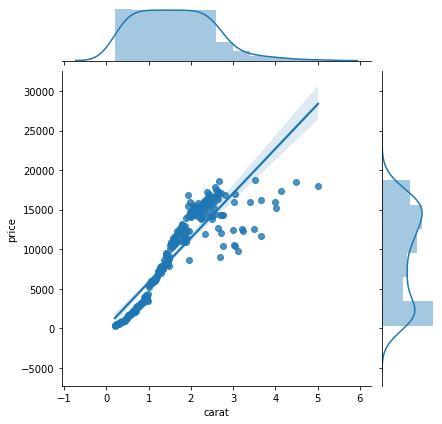

In [69]:
sns.jointplot(x='carat', y='price', data=price_carat, kind='reg')

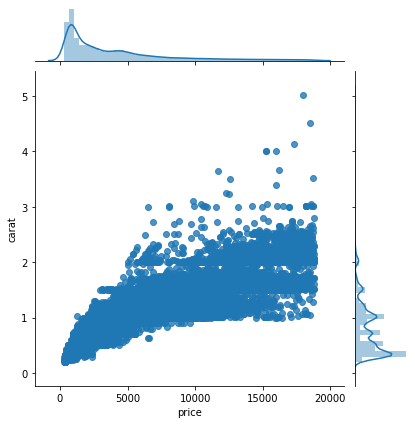

In [70]:
sns.jointplot(x='price', y='carat', data=df, kind='reg')